# Lomb-Scargle Analysis

Overview:
* Imports
* Helper Functions
* Simple Case
* Options
* MultiBand LS
* Examples

In [148]:
#Imports

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks


In [98]:
# Helper functions

# read-in synthetic type files, with report of some statistics
def syn_read(fname):
    """
    add info later
    """
    data = pd.read_csv(fname, sep = ' ')
    print('File name for light curve',fname)
    print('Number of Observations: ',len(data))
    print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
    print('Time range:',np.min(data['Time']),np.max(data['Time']))

    return data
    

# read-in Kelly's lightcurves
def load_lcfile(fname):
    """
    add info later
    """
    data = pd.read_csv(fname,sep=' ',header=None)
    data.columns = ['Time','Phase','Flux','err','band']
    print('File name for light curve',fname)
    print('Number of Observations: ',len(data))
    print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
    print('Time range:',np.min(data['Time']),np.max(data['Time']))


    return data


# read-in Rubin style lightcurve
#coming soon


# plotting single lightcurve
def lc_plot(data,**kwargs):
    plt.plot(data['Time'],data['Flux'],'ob-',**kwargs)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Flux')
    
    return



# plotting multiband lightcurve




In [4]:
help(syn_read)

Help on function syn_read in module __main__:

syn_read(fname)
    add info later



## Lomb-Scargle Intro with greater exploration

File name for light curve ./syn_data/syn_1.txt
Number of Observations:  100
Brightness range: 11.000125872326125 12.999874127673875
Time range: 0.0 7.25


Text(0.5, 1.0, 'Light curve file: ./syn_data/syn_1.txt')

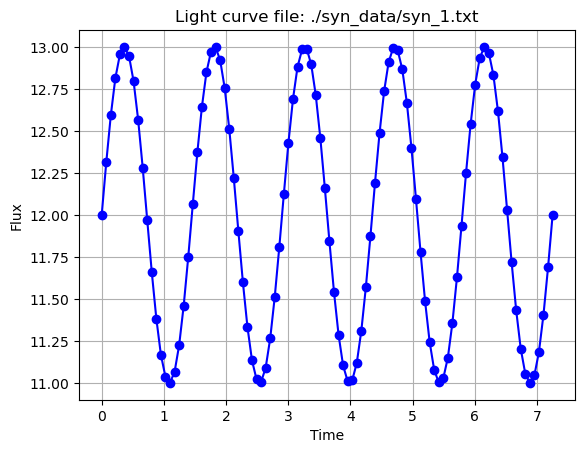

In [99]:
# Testing with our first synthetic light curve
file = './syn_data/syn_1.txt'
data = syn_read(file)
lc_plot(data)
plt.title('Light curve file: '+ file)

In [111]:
# Use the data points to estimate the alias for the time-spacing using the first and second measurements
step = data['Time'][1]-data['Time'][0]
fstep = 1/step
print('alias frequency for time step expected at:',fstep)

alias frequency for time step expected at: 13.655172413793109


In [100]:
# Do the initial LombScargle without any arguments to autopower
freq,power = LombScargle(data['Time'],data['Flux']).autopower()

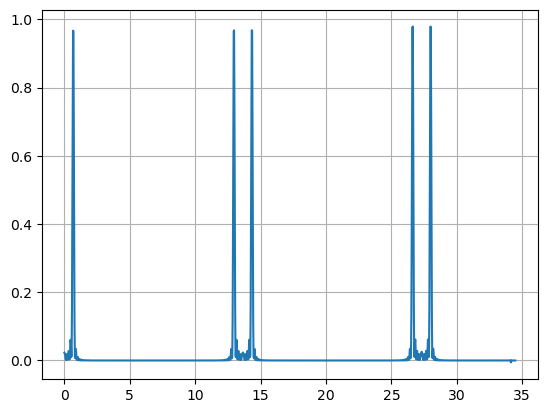

In [102]:
#Plot the full results
plt.plot(freq,power)
plt.grid(True)

(0.0, 1.0)

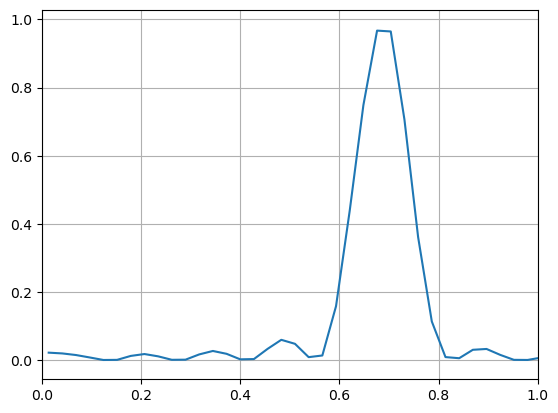

In [103]:
# Zoom  in on the first peak for the plot
plt.plot(freq,power)
plt.grid(True)
plt.xlim(0,1)

In [107]:
# Improve the accuracy of the plot by increasing the number of points per peak
freq,power = LombScargle(data['Time'],data['Flux']).autopower(samples_per_peak= 15)

(0.0, 1.0)

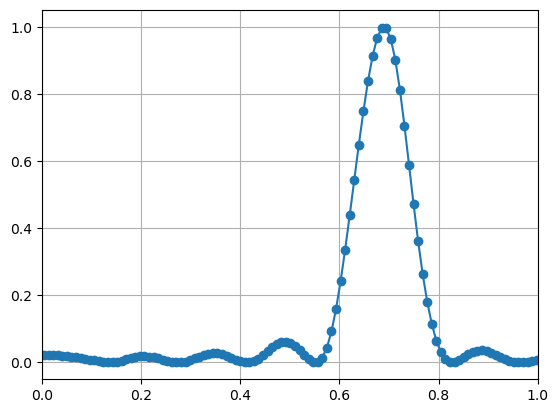

In [108]:
# Zoom  in on the first peak for the plot and show the points on the line
plt.plot(freq,power,'o-')
plt.grid(True)
plt.xlim(0,1)

In [112]:
# Use the time step frequency to limit the upper range of the search
freq,power = LombScargle(data['Time'],data['Flux']).autopower(minimum_frequency=0.01, maximum_frequency=0.5*fstep,
    samples_per_peak=20)

(0.0, 1.0)

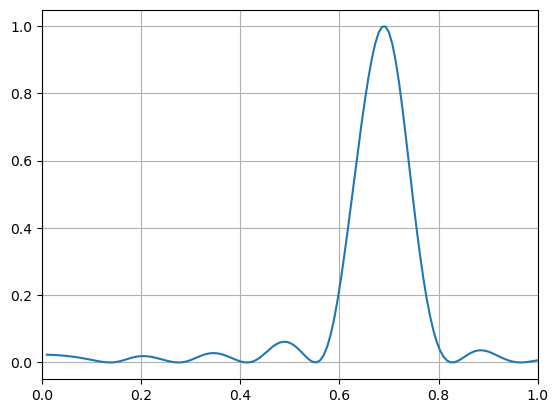

In [114]:
#Plot the full results for the new limited scan and limit plotting further if needed
plt.plot(freq,power)
plt.grid(True)
plt.xlim(0,1)

In [115]:
# Find the period for the strongest peak in the new limited range
# Note that if you scan still had the alias periods, you might not find the right value
ind_max_power = power.argmax()
period = 1/freq[ind_max_power]
print('Peak frequency',freq[ind_max_power])
print('Peak period',period)

Peak frequency 0.6927586206896552
Peak period 1.443504230960677


## Lomb-Scargle simplified steps
You can repeat the above steps for any new light curve, but you will typically start with the more limited scan. 
Below is an example for the next lightcurve without the extra exploratory steps

File name for light curve ./syn_data/syn_2.txt
Number of Observations:  100
Brightness range: 11.000125872326125 12.999874127673875
Time range: 0.0 15.0


Text(0.5, 1.0, 'Light curve file: ./syn_data/syn_2.txt')

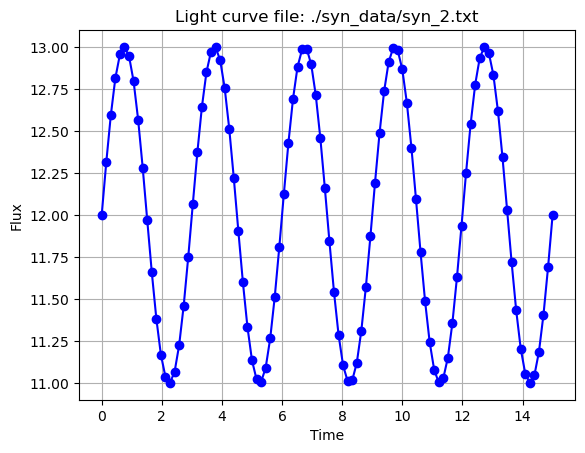

In [116]:
# Testing with our second synthetic light curve
file = './syn_data/syn_2.txt'
data = syn_read(file)
lc_plot(data)
plt.title('Light curve file: '+ file)

In [117]:
# Use the data points to estimate the alias for the time-spacing using the first and second measurements
step = data['Time'][1]-data['Time'][0]
fstep = 1/step
print('alias frequency for time step expected at:',fstep)

alias frequency for time step expected at: 6.600000000000001


In [118]:
# Use the time step frequency to limit the upper range of the search
freq,power = LombScargle(data['Time'],data['Flux']).autopower(minimum_frequency=0.01, maximum_frequency=0.5*fstep,
    samples_per_peak=20)

(0.0, 1.0)

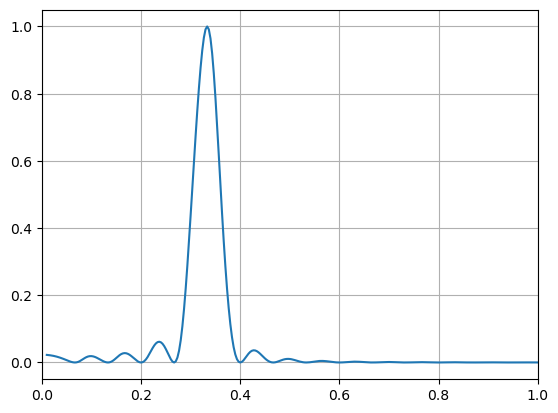

In [119]:
#Plot the full results for the new limited scan and limit plotting further if needed
plt.plot(freq,power)
plt.grid(True)
plt.xlim(0,1)

In [ ]:
# Find the period for the strongest peak in the new limited range
# Note that if you scan still had the alias periods, you might not find the right value
ind_max_power = power.argmax()
period = 1/freq[ind_max_power]
print('Peak frequency',freq[ind_max_power])
print('Peak period',period)

## Lomb-Scargle for Multi-periodic

File name for light curve ./syn_data/syn_21.txt
Number of Observations:  1000
Brightness range: 10.50336894104447 13.479987601510638
Time range: 0.0702784156172448 74.8589769721996


Text(0.5, 1.0, 'Light curve file: ./syn_data/syn_21.txt')

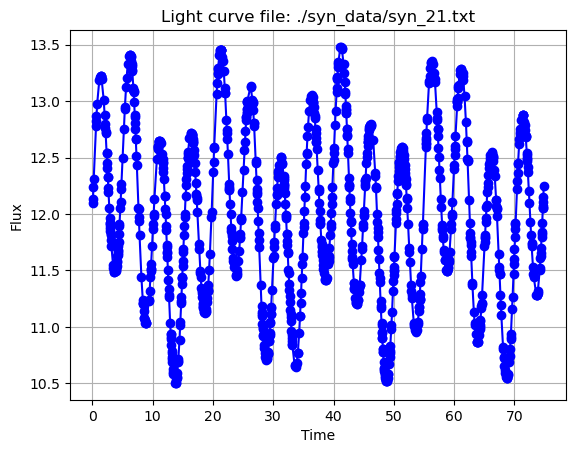

In [137]:
# Testing with our second synthetic light curve
file = './syn_data/syn_21.txt'
data = syn_read(file)
lc_plot(data)
plt.title('Light curve file: '+ file)

In [138]:
# Use the data points to estimate the alias for the time-spacing using the first and second measurements
step = data['Time'][1]-data['Time'][0]
fstep = 1/step
print('alias frequency for time step expected at:',fstep)

alias frequency for time step expected at: 43.88801431146889


In [144]:
# Use the time step frequency to limit the upper range of the search
freq,power = LombScargle(data['Time'],data['Flux']).autopower(minimum_frequency=0.01,
    maximum_frequency=0.5*fstep, samples_per_peak=20)

(0.0, 1.0)

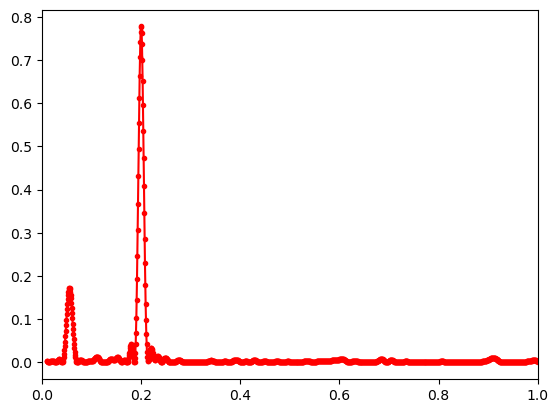

In [146]:
plt.plot(freq,power,'.r-')
plt.xlim(0,1)

In [147]:
ind_max_power = power.argmax()
period = 1/freq[ind_max_power]
print('Peak period',period)

Peak period 5.003295691812549


### Finding the values for Multiple peaks

We can  use another package called `scipy` with various scientific python codes.
Within the `scipy.signal` package is a function called `find_peaks()`

I'm still working out the prominence values to ignore the noise. Ideally, this would be based on a statistical measure of the signal to noise. 

----
For a lightcurve with multiple signals


In [160]:
file = './syn_data/syn_21.txt'
data = syn_read(file)
# Use the time step frequency to limit the upper range of the search
freq,power = LombScargle(data['Time'],data['Flux']).autopower(minimum_frequency=0.01,
    maximum_frequency=0.5*fstep, samples_per_peak=20)

File name for light curve ./syn_data/syn_21.txt
Number of Observations:  1000
Brightness range: 10.50336894104447 13.479987601510638
Time range: 0.0702784156172448 74.8589769721996


In [178]:
#First find peaks above the prominence limit
peaks, _ = find_peaks(power, prominence = 0.05)

#Then sort them in order of highest power
sorted_peak_indices = peaks[np.argsort(power[peaks])][::-1]

# Create a list of the pairs with rounded values
signals = []
for i in sorted_peak_indices:
    signals.append([np.round(1/freq[i],5),np.round(power[i],2),np.round(freq[i],5)])

#Then report the frequencies for those peaks
print('highest signals:\n','period','power','frequency')
for i in range(len(signals)):
    print(signals[i])

highest signals:
 period power frequency
[5.0033, 0.78, 0.19987]
[18.03055, 0.17, 0.05546]
